In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import pygsheets
import dataframe_image as dfi
from datetime import date
from PIL import Image   
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import PoissonRegressor                                                                             
import re
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import numpy as np
from mplsoccer import FontManager
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request

In [2]:
#Defino modelo
import numpy as np
# Lists to score training data
X = []
y = []

# Iterate through each World Cup from 1990 - 2018
for year in ['1990', '1994', '1998', '2002', '2006', '2010', '2014', '2018']:

    # Download file using urllib
    urllib.request.urlretrieve(f"https://github.com/norrisjamie23/WorldCup2022Forecasting/raw/main/data/{year}.csv", f"{year}.csv")
    
    # Open file containing data from WC
    data = np.loadtxt(f"{year}.csv", delimiter=',', dtype=str, usecols=0, encoding='UTF-8')
    data = np.char.replace(data, '−', '-')

    # Get ELO ratings of "home" and "away" teams from each game in WC
    home_elo = data[10::16].astype(int) - data[8::16].astype(int)
    away_elo = data[11::16].astype(int) - data[9::16].astype(int)

    # Get score for each team
    home_score = data[4::16].astype(int)
    away_score = data[5::16].astype(int)

    # Add these to our lists
    X.append(np.stack((home_elo, away_elo), axis=-1))
    y.append(np.stack((home_score, away_score), axis=-1))

# Concatenate into a NumPy array
X = np.concatenate(X)
y = np.concatenate(y)

# Split data into training and testing partitions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=2022
)

# No home advantage in the World Cup (mostly!), so duplicate the dataset
X_train = np.concatenate((X_train, X_train[:, ::-1]), axis=0)
y_train = np.concatenate((y_train, y_train[:, ::-1]), axis=0)

model = MultiOutputRegressor(
    PoissonRegressor(fit_intercept=True)
)

# Fit our PoissonRegressor
model.fit(X_train, y_train)

# See the predicted deviance explained on the test set
model.score(X_test, y_test)

-0.22831328140576668

In [33]:
url = 'https://footballdatabase.com/ranking/argentina/1'
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

html_str = str(soup)

df = pd.read_html(html_str)[0]

<ipython-input-33-84974f96dec8>:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html_str)[0]


In [34]:
df_elo_arg = df.rename(columns={'Club / Country': 'Pais'})[['Pais', 'Points']].drop(5)
df_elo_arg.Pais = df_elo_arg.Pais.str.replace('Argentina', '')
df_elo_arg

,Pais,Points
0,River Plate,1737
1,Talleres de Cordoba,1644
2,Boca Juniors,1635
3,Defensa y Justicia,1631
4,Estudiantes de la Plata,1627
6,Racing Club,1603
7,San Lorenzo de Almagro,1583
8,Argentinos Juniors,1579
9,Rosario Central,1557
10,Atlético Tucumán,1557


In [35]:
url = 'https://www.transfermarkt.com.ar/copa-de-la-liga-profesional-de-futbol/startseite/wettbewerb/CDLP'
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

In [36]:
soup.select_one('[class="items"]')
#Encontre esto y le pregunte al chat como pasar de esto a un dataframe

<table class="items">
<thead>
<tr>
<th colspan="2" id="yw1_c0">Club</th><th class="hide" id="yw1_c1"><a class="sort-link" href="/copa-de-la-liga-profesional-de-futbol/startseite/wettbewerb/CDLP/sort/name">name</a></th><th class="zentriert" id="yw1_c2"><a class="sort-link" href="/copa-de-la-liga-profesional-de-futbol/startseite/wettbewerb/CDLP/sort/anzahl_spieler_hidden.desc">Equipo</a></th><th class="zentriert" id="yw1_c3"><a class="sort-link" href="/copa-de-la-liga-profesional-de-futbol/startseite/wettbewerb/CDLP/sort/alter_durchschnitt.desc">Edad</a></th><th class="zentriert" id="yw1_c4"><a class="sort-link" href="/copa-de-la-liga-profesional-de-futbol/startseite/wettbewerb/CDLP/sort/legionaere.desc">Extranjeros</a></th><th class="rechts" id="yw1_c5"><a class="sort-link" href="/copa-de-la-liga-profesional-de-futbol/startseite/wettbewerb/CDLP/sort/marktwert_schnitt_anzeige.desc">ø-Valor de mercado</a></th><th class="rechts" id="yw1_c6"><a class="sort-link" href="/copa-de-la-liga-profe

In [37]:
table = soup.find('table', {'class': 'items'})

# Extract column headers
headers = [th.text.strip() for th in table.select('thead th')]

# Extract table rows
data = []
for row in table.select('tbody tr'):
    row_data = [td.text.strip() for td in row.find_all('td')]
    data.append(row_data)

In [38]:
df = pd.DataFrame(data, columns=headers)

In [39]:
df_valoraciones = df[['name', 'Valor de mercado total']]
df_valoraciones['Valor de mercado total'] = df_valoraciones['Valor de mercado total'].str.strip(' mill. €').str.replace(',', '.')
df_valoraciones['Valor de mercado total'] = df_valoraciones['Valor de mercado total'].astype(float) * 1000000
df_valoraciones['name'] = df_valoraciones['name'].str.replace('CA ', '').str.replace('Club Atlético ', '').str.replace('Club ', '').str.replace('CSD ', '').str.replace('CD ', '').str.replace('AA ', '')
df_valoraciones

<ipython-input-39-f4ae5a0b1129>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoraciones['Valor de mercado total'] = df_valoraciones['Valor de mercado total'].str.strip(' mill. €').str.replace(',', '.')
<ipython-input-39-f4ae5a0b1129>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoraciones['Valor de mercado total'] = df_valoraciones['Valor de mercado total'].astype(float) * 1000000
<ipython-input-39-f4ae5a0b1129>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,name,Valor de mercado total
0,Boca Juniors,86350000.0
1,River Plate,80750000.0
2,Talleres,58180000.0
3,Vélez Sarsfield,58150000.0
4,Racing Club,57580000.0
5,Argentinos Juniors,42400000.0
6,San Lorenzo de Almagro,41700000.0
7,Estudiantes de La Plata,38750000.0
8,Godoy Cruz Antonio Tomba,32130000.0
9,Belgrano,31630000.0


In [40]:
df_valoraciones['name'] = df_valoraciones['name'].replace({
    'de Gimnasia y Esgrima La Plata': 'Gimnasia y Esgrima La Plata',
    'Tucumán': 'Atlético Tucumán',
    'Instituto AC Córdoba': 'Instituto',
    'Sarmiento (Junín)': 'Sarmiento',
    'Central Córdoba (SdE)': 'Central Cordoba'
})

df_elo_arg['Pais'] = df_elo_arg['Pais'].replace({
    'Talleres de Cordoba': 'Talleres',
    'Estudiantes de la Plata': 'Estudiantes de La Plata',
    'Unión Santa Fe': 'Unión',
    'Club Atlético Platense': 'Platense',
    'Instituto Atlético Central Córdoba': 'Instituto',
    'CA Central Cordoba': 'Central Cordoba'
})

df_valoraciones.merge(df_elo_arg, left_on='name', right_on='Pais',how='left')

<ipython-input-40-234222d37566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoraciones['name'] = df_valoraciones['name'].replace({


,name,Valor de mercado total,Pais,Points
0,Boca Juniors,86350000.0,Boca Juniors,1635
1,River Plate,80750000.0,River Plate,1737
2,Talleres,58180000.0,Talleres,1644
3,Vélez Sarsfield,58150000.0,Vélez Sarsfield,1489
4,Racing Club,57580000.0,Racing Club,1603
5,Argentinos Juniors,42400000.0,Argentinos Juniors,1579
6,San Lorenzo de Almagro,41700000.0,San Lorenzo de Almagro,1583
7,Estudiantes de La Plata,38750000.0,Estudiantes de La Plata,1627
8,Godoy Cruz Antonio Tomba,32130000.0,Godoy Cruz Antonio Tomba,1544
9,Belgrano,31630000.0,Belgrano,1473


In [41]:
#Armo arrays en base al df de elo ratings
teams, elo_scores = np.array(df_elo_arg['Pais']), np.array(df_elo_arg['Points'])
elo_scores = elo_scores.astype(float)
#Armo arrays en base al df de valoraciones
equipos, values = np.array(df_valoraciones['name']), np.array(df_valoraciones['Valor de mercado total'])
lista_values = dict(zip(equipos, values))
values = values.astype(float)

#Pondero la lista de valoraciones para que se asemeje a la de elos. Esto dejo la magia que le metio Jamie.
# See how much list of team values needs to be scaled to match std dev of elo scores
scale_std = values.std() / elo_scores.std()
# Scale it appropriately
values = values / scale_std

# Work out the difference in means
scale_mean = elo_scores.mean() - values.mean()

# Adjust mean of values
values += scale_mean

# Get values in dictionary form
values_init = dict(zip(equipos, values))

In [42]:
df_values_init = pd.DataFrame(list(values_init.items()))

df_values_init

,0,1
0,Boca Juniors,1744.834360
1,River Plate,1718.814112
2,Talleres,1613.943221
3,Vélez Sarsfield,1613.803827
4,Racing Club,1611.155337
5,Argentinos Juniors,1540.621880
6,San Lorenzo de Almagro,1537.369349
7,Estudiantes de La Plata,1523.662254
8,Godoy Cruz Antonio Tomba,1492.902604
9,Belgrano,1490.579368


In [43]:
df_elo_ratings = df_valoraciones.merge(df_elo_arg, left_on='name', right_on='Pais',how='left')[['name', 'Points']].fillna(1400)
df_elo_ratings

,name,Points
0,Boca Juniors,1635
1,River Plate,1737
2,Talleres,1644
3,Vélez Sarsfield,1489
4,Racing Club,1603
5,Argentinos Juniors,1579
6,San Lorenzo de Almagro,1583
7,Estudiantes de La Plata,1627
8,Godoy Cruz Antonio Tomba,1544
9,Belgrano,1473


In [44]:
df_values_init.merge(df_elo_ratings, left_on=0, right_on='name', how='outer').set_index(0)

,1,name,Points
0,,,
Boca Juniors,1744.834360,Boca Juniors,1635
River Plate,1718.814112,River Plate,1737
Talleres,1613.943221,Talleres,1644
Vélez Sarsfield,1613.803827,Vélez Sarsfield,1489
Racing Club,1611.155337,Racing Club,1603
Argentinos Juniors,1540.621880,Argentinos Juniors,1579
San Lorenzo de Almagro,1537.369349,San Lorenzo de Almagro,1583
Estudiantes de La Plata,1523.662254,Estudiantes de La Plata,1627
Godoy Cruz Antonio Tomba,1492.902604,Godoy Cruz Antonio Tomba,1544


In [45]:
df_todo = df_values_init.merge(df_elo_ratings, left_on=0, right_on='name', how='outer').set_index(0)
#df_todo['1_y'] = df_todo['1_y'].fillna('1300') #Aca considero a los ascendidos con ELO 1300.

#Paso el df mergeado a listas
lista_values_2 = df_todo[[1]].to_dict()[1]
lista_elo_ratings_2 = df_todo[['Points']].to_dict()['Points']

In [46]:
#Armo el valor de cada equipo en base al elo y la valoración
elo_fraction = 0.70

# Armo el combinado entre ELO y valoraciones.
for key in lista_elo_ratings_2.keys():
    print(lista_elo_ratings_2[key], lista_values_2[key], key)
    lista_elo_ratings_2[key] = elo_fraction * float(lista_elo_ratings_2[key]) + (1 - elo_fraction) * lista_values_2[key]

1635 1744.8343596190148 Boca Juniors
1737 1718.8141119413808 River Plate
1644 1613.9432208549163 Talleres
1489 1613.8038266709289 Vélez Sarsfield
1603 1611.1553371751697 Racing Club
1579 1540.621880077583 Argentinos Juniors
1583 1537.3693491178788 San Lorenzo de Almagro
1627 1523.662254359125 Estudiantes de La Plata
1544 1492.902604425922 Godoy Cruz Antonio Tomba
1473 1490.5793680261331 Belgrano
1451 1488.9531025462811 Huracán
1631 1487.8844138023783 Defensa y Justicia
1549 1487.5591607064077 Lanús
1544 1471.389435363878 Newell's Old Boys
1474 1464.791443988478 Independiente
1466 1458.1469878850821 Gimnasia y Esgrima La Plata
1465 1456.1954693092596 Banfield
1557 1447.4601004460537 Rosario Central
1497 1444.114640030358 Unión
1557 1441.7914036305692 Atlético Tucumán
1514 1417.2580272487999 Tigre
1466 1416.7004505128507 Instituto
1491 1409.591347129497 Platense
1450 1391.4701032111448 Central Cordoba
1518 1386.1266594916306 Barracas Central
1458 1383.0135227159137 Sarmiento
1400 1382.82

In [47]:
dict(sorted(lista_elo_ratings_2.items(), key=lambda lista_elo_ratings_2: lista_elo_ratings_2[1], reverse=True))

{'River Plate': 1731.544233582414,
 'Boca Juniors': 1667.9503078857047,
 'Talleres': 1634.9829662564748,
 'Racing Club': 1605.446601152551,
 'Estudiantes de La Plata': 1595.9986763077375,
 'Defensa y Justicia': 1588.0653241407133,
 'San Lorenzo de Almagro': 1569.3108047353635,
 'Argentinos Juniors': 1567.486564023275,
 'Lanús': 1530.5677482119222,
 'Godoy Cruz Antonio Tomba': 1528.6707813277767,
 'Vélez Sarsfield': 1526.4411480012786,
 'Rosario Central': 1524.138030133816,
 'Atlético Tucumán': 1522.4374210891706,
 "Newell's Old Boys": 1522.2168306091635,
 'Tigre': 1484.97740817464,
 'Unión': 1481.1343920091074,
 'Barracas Central': 1478.4379978474892,
 'Belgrano': 1478.2738104078398,
 'Independiente': 1471.2374331965434,
 'Platense': 1466.5774041388493,
 'Gimnasia y Esgrima La Plata': 1463.6440963655248,
 'Huracán': 1462.3859307638843,
 'Banfield': 1462.3586407927778,
 'Instituto': 1451.2101351538554,
 'Sarmiento': 1435.504056814774,
 'Central Cordoba': 1432.4410309633433,
 'Independie

In [48]:
df_export = pd.DataFrame.from_dict(lista_elo_ratings_2, orient='index').rename(columns={0:'ELO + Valoración'}).sort_values(ascending=False, by= 'ELO + Valoración').style.background_gradient()
df_export

,ELO + Valoración
River Plate,1731.544234
Boca Juniors,1667.950308
Talleres,1634.982966
Racing Club,1605.446601
Estudiantes de La Plata,1595.998676
Defensa y Justicia,1588.065324
San Lorenzo de Almagro,1569.310805
Argentinos Juniors,1567.486564
Lanús,1530.567748
Godoy Cruz Antonio Tomba,1528.670781


In [49]:
def simulate_matches(fixtures, teams_df=None, lam_multiplier=1):
    """Function to simulate matches.

    Parameters
    ----------
    fixtures : list (float or str), optional
        A 2D list of fixtures, either represented as strings when team_df is
        provided, or as ELO scores if not.

    team_df : Pandas dataframe, optional
        A Pandas dataframe with "Team" and "ELO" as columns. If fixtures is in
        str form, this will be used to map it to ELO float form.

    lam_multiplier : float, optional
        How much to scale a teams lambda value by. If they're expected to score
        2.5 goals in a game, and we want to know how many they'll score in a 
        half, we can use lam_multiplier to scale the expected number of goals
        down to 1.25.

    Returns
    ------
    score : ndarray
        This is the same size as fixtures, with each element corresponding to 
        how many goals each team scored in a simulation.
    """
          
    # If no fixtures to simulate, return none
    if(len(fixtures)) == 0:
        return None
    
    # If teams_df is provided, we need to map each teams name to their ELO
    if teams_df is not None:
        # Get ELO scores for each team
        elo_scores = np.vectorize(dict(zip(teams_df.Team, teams_df.ELO)).get)(fixtures).astype(np.float32)
    else:
        # Otherwise, we already have the ELO scores for each team
        elo_scores = fixtures
    
    # Predict expected number of goals per team
    lam = model.predict(elo_scores)

    # Using expected number of goals per team, draw the number of goals per team 
    # from a Poisson distribution
    score = np.random.poisson(lam * lam_multiplier)
    
    return score

In [314]:
score = simulate_matches([[1990, 2010]])
score

array([[1, 2]])

In [50]:
def get_Ws(results, ELOs):
    """Returns result (1 for W, 0 for L, 0.5 for D) for the team with a higher ELO

    Parameters
    ----------
    results : ndarray (int)
        A 2D array of scores.

    ELOs : ndarray (float)
        A 2D array of ELOs for the teams in results.

    Returns
    ------
    Ws : ndarray
        The result for the "strongest" team in each fixture.
    """

    # Initialise Ws array
    Ws = np.zeros(ELOs.shape[:1])
    
    # Mask for games in which "home" and "away" teams won respectively
    team1_wins = results[:, 0] > results[:, 1]
    team2_wins = results[:, 0] < results[:, 1]
    
    # Mask for games that ended in draws
    draws = results[:, 0] == results[:, 1]

    # Matches with an "away" team that is stronger
    away_better = np.argmax(ELOs, axis=-1).astype(bool)

    # As above for "home"
    home_better = np.logical_not(away_better)
    
    # If "home" team won and they had a higher ELO, W is 1
    Ws[np.logical_and(home_better, team1_wins)] = 1
    
    # If "away" team won and they had a higher ELO, W is 1
    Ws[np.logical_and(away_better, team2_wins)] = 1
    
    # For draws, W is 1. Remaining values are already 0 so no need to change
    Ws[draws] = 0.5
    
    return Ws


def get_elo_adjustments(ELOs, Ws, results):
    """Get adjustment for ELOs of each team given the final score in each game.

    Parameters
    ----------
    results : ndarray (int)
        A 2D array of scores.

    ELOs : ndarray (float)
        A 2D array of ELOs for the teams in results.

    Ws : ndarray (float)
        A 1D array of results for the "strongest" team in each fixture.

    Returns
    ------
    ELO_changes_arr : ndarray
        Of the same shape as results, this says how much to adjust the ELO by.
        Each element corresponds to the same team in ELOs/results.
    """

    # Get difference in ELOs for each fixture
    drs = np.abs(ELOs[:, 0] - ELOs[:, 1])
    
    # Get probability of higher ELO team winning
    Ws_e = 1 / (10**(-drs/400) + 1)
    
    # Work out weight constant
    Ks = np.ones(ELOs.shape[0]) * 60
    
    score_diffs = np.abs(results[:, 0] - results[:, 1])
    Ks[np.where(score_diffs == 2)] *= 1.5
    Ks[np.where(score_diffs > 2)] *= 1 + (3/4 + (score_diffs[score_diffs > 2]-3)/8)
    
    # How much will ELOs change?
    ELO_changes = Ks * (Ws - Ws_e)
    
    # Put this into array showing changes for each team
    ELO_changes_arr = np.zeros((ELOs.shape[0], 2))
    ELO_changes_arr[np.arange(ELOs.shape[0]), np.argmax(ELOs, axis=1)] = ELO_changes
    ELO_changes_arr[np.arange(ELOs.shape[0]), 1 - np.argmax(ELOs, axis=1)] = -ELO_changes
        
    return ELO_changes_arr

In [51]:
df_wiki = pd.read_html('https://es.wikipedia.org/wiki/Copa_de_la_Liga_Profesional_2024')

In [52]:
df_wiki[13]['Fecha 1']['Zona A'][['Local', 'Visitante']].iloc[9:]

,Local,Visitante
9,Tigre,Sarmiento (J)
10,Central Córdoba (SdE),Newell's Old Boys
11,San Lorenzo,Lanús
12,Platense,Boca Juniors
13,Racing Club,Unión
14,Godoy Cruz,Defensa y Justicia
15,Estudiantes (LP),Belgrano


In [53]:
#Uso lo que me sirve y le agrego una col de fechas para diferenciar.

#Armo el df_torneo en base al html de Wikipedia.
df_torneo = pd.DataFrame()
for i in range(0,14):
    try:
        df_1 = pd.read_html('https://es.wikipedia.org/wiki/Copa_de_la_Liga_Profesional_2024')[13+i][f'Fecha {i+1}']['Zona A'][['Local', 'Visitante']].iloc[:7]
        df_2 = pd.read_html('https://es.wikipedia.org/wiki/Copa_de_la_Liga_Profesional_2024')[13+i][f'Fecha {i+1}']['Zona A'][['Local', 'Visitante']].iloc[9:]
        df_1['Fecha'] = f"Fecha {i+1}"
        df_2['Fecha'] = f"Fecha {i+1}"
        df_torneo = pd.concat([df_torneo, df_1, df_2])
        print(df_torneo['Fecha'])
    except KeyError:
        df_1 = pd.read_html('https://es.wikipedia.org/wiki/Copa_de_la_Liga_Profesional_2024')[13+i][f'Fecha {i+1}']['Interzonales'][['Local', 'Visitante']]
        df_1['Fecha'] = f"Fecha {i+1}"
        df_torneo = pd.concat([df_torneo, df_1])
        print(df_torneo['Fecha'])

0     Fecha 1
1     Fecha 1
2     Fecha 1
3     Fecha 1
4     Fecha 1
5     Fecha 1
6     Fecha 1
9     Fecha 1
10    Fecha 1
11    Fecha 1
12    Fecha 1
13    Fecha 1
14    Fecha 1
15    Fecha 1
Name: Fecha, dtype: object
0     Fecha 1
1     Fecha 1
2     Fecha 1
3     Fecha 1
4     Fecha 1
5     Fecha 1
6     Fecha 1
9     Fecha 1
10    Fecha 1
11    Fecha 1
12    Fecha 1
13    Fecha 1
14    Fecha 1
15    Fecha 1
0     Fecha 2
1     Fecha 2
2     Fecha 2
3     Fecha 2
4     Fecha 2
5     Fecha 2
6     Fecha 2
9     Fecha 2
10    Fecha 2
11    Fecha 2
12    Fecha 2
13    Fecha 2
14    Fecha 2
15    Fecha 2
Name: Fecha, dtype: object
0     Fecha 1
1     Fecha 1
2     Fecha 1
3     Fecha 1
4     Fecha 1
5     Fecha 1
6     Fecha 1
9     Fecha 1
10    Fecha 1
11    Fecha 1
12    Fecha 1
13    Fecha 1
14    Fecha 1
15    Fecha 1
0     Fecha 2
1     Fecha 2
2     Fecha 2
3     Fecha 2
4     Fecha 2
5     Fecha 2
6     Fecha 2
9     Fecha 2
10    Fecha 2
11    Fecha 2
12    Fecha 2
13    Fe

In [54]:
df_torneo

,Local,Visitante,Fecha
0,Instituto,Deportivo Riestra,Fecha 1
1,Atlético Tucumán,Rosario Central,Fecha 1
2,Talleres (C),Gimnasia y Esgrima (LP),Fecha 1
3,Barracas Central,Vélez Sarsfield,Fecha 1
4,Independiente Rivadavia,Independiente,Fecha 1
...,...,...,...
11,Lanús,Estudiantes (LP),Fecha 14
12,Central Córdoba (SdE),San Lorenzo,Fecha 14
13,Defensa y Justicia,Newell's Old Boys,Fecha 14
14,Boca Juniors,Godoy Cruz,Fecha 14


In [55]:
df_torneo = df_torneo.replace({
    'Def y Justicia': 'Defensa y Justicia',
    'Estudiantes (LP)': 'Estudiantes de La Plata',
    'Talleres (C)': 'Talleres',
    'Central Córdoba (SdE)': 'Central Cordoba',
    'Velez': 'Vélez Sarsfield',
    'Colon': 'Colón',
    'Gimnasia y Esgrima (LP)': 'Gimnasia y Esgrima La Plata',
    'Argentinos': 'Argentinos Juniors',
    'Newells': "Newell's Old Boys",
    'Huracan': 'Huracán',
    'Sarmiento (J)': 'Sarmiento',
    'Lanus': 'Lanús',
    'Atl Tucuman':'Atlético Tucumán',
    'Union':'Unión',
    'Godoy Cruz': 'Godoy Cruz Antonio Tomba',
    'Racing': 'Racing Club',
    'San Lorenzo': 'San Lorenzo de Almagro'
})

In [56]:
fecha1 = df_torneo[df_torneo['Fecha'] == 'Fecha 1']
np.array(fecha1[['Local', 'Visitante']])

array([['Instituto', 'Deportivo Riestra'],
       ['Atlético Tucumán', 'Rosario Central'],
       ['Talleres', 'Gimnasia y Esgrima La Plata'],
       ['Barracas Central', 'Vélez Sarsfield'],
       ['Independiente Rivadavia', 'Independiente'],
       ['Banfield', 'Huracán'],
       ['River Plate', 'Argentinos Juniors'],
       ['Tigre', 'Sarmiento'],
       ['Central Cordoba', "Newell's Old Boys"],
       ['San Lorenzo de Almagro', 'Lanús'],
       ['Platense', 'Boca Juniors'],
       ['Racing Club', 'Unión'],
       ['Godoy Cruz Antonio Tomba', 'Defensa y Justicia'],
       ['Estudiantes de La Plata', 'Belgrano']], dtype=object)

In [201]:
#Armo array de equipòs, clave que los nombres sean consistentes.
equipos = np.array(list(lista_elo_ratings_2.keys()))

#armo array de fixtures
fixtures = np.array(fecha1[['Local', 'Visitante']])

In [202]:
equipos

array(['Boca Juniors', 'River Plate', 'Talleres', 'Vélez Sarsfield',
       'Racing Club', 'Argentinos Juniors', 'San Lorenzo de Almagro',
       'Estudiantes de La Plata', 'Godoy Cruz Antonio Tomba', 'Belgrano',
       'Huracán', 'Defensa y Justicia', 'Lanús', "Newell's Old Boys",
       'Independiente', 'Gimnasia y Esgrima La Plata', 'Banfield',
       'Rosario Central', 'Unión', 'Atlético Tucumán', 'Tigre',
       'Instituto', 'Platense', 'Central Cordoba', 'Barracas Central',
       'Sarmiento', 'Independiente Rivadavia', 'Deportivo Riestra'],
      dtype='<U27')

In [59]:
def simular_1fecha(all_groups_df, fixtures):
    """Esta función si que la cambie bastante.
    Simula los partidos de los fixtures que le pases (arriba defini arrays de fixtures)
    Y usa un df que se arma de 0 para ir metiendole la info ahí simulación a simulación.

    Parameters
    ----------
    all_groups_df : Dataframe
        A dataframe containing team names and ELOs.

    Returns
    ------
    sorted_groups_df : Dataframe
        Dataframe con la tabla despues de 1 fecha.
    """

    # Simulo con la lista de fixtures y el df creado.
    results = simulate_matches(fixtures, all_groups_df)

    # Get column indices for GF and GA
    GF_col = all_groups_df.columns.get_loc("GF")
    GA_col = all_groups_df.columns.get_loc("GA")

    # Update goals scored/conceded for "home" team
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[:, 0]), GF_col] += results[:, 0]
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[:, 1]), GA_col] += results[:, 0]
    # Update goals scored/conceded for "away" team
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[:, 1]), GF_col] += results[:, 1]
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[:, 0]), GA_col] += results[:, 1]

    # Index of ELO column
    ELO_col = all_groups_df.columns.get_loc("ELO")

    # Get ELO for "home" and "away" teams respectively
    team1_ELOs = np.array(all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[:, 0]), ELO_col])
    team2_ELOs = np.array(all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[:, 1]), ELO_col])

    # Combine into one ELO array
    ELOs = np.stack((team1_ELOs, team2_ELOs), axis=1).astype(np.int32)

    # Index of points column
    points_col = all_groups_df.columns.get_loc("Points")

    # Mask for games in which "home" team won
    team1_wins = results[:, 0] > results[:, 1]
    # Add 3 points for these teams
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[team1_wins, 0]), points_col] += 3
    # Mask for games in which "away" team won
    team2_wins = results[:, 0] < results[:, 1]
    # Add 3 points for these teams
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[team2_wins, 1]), points_col] += 3
    # Mask for games in which "away" team won
    draws = results[:, 0] == results[:, 1]
    # Add 1 point to each of these teams
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[draws].flatten()), points_col] += 1

    # Use get_Ws to get W value for ELO updating
    Ws = get_Ws(results, ELOs)
            
    # How much is to be added to ELO, elementwise matching teams in fixtures away
    elo_adjustments = get_elo_adjustments(ELOs, Ws, results)

    # Update ELO for "home" and "away" teams respectively
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[:, 0]), ELO_col] += elo_adjustments[:, 0]
    all_groups_df.iloc[pd.Index(all_groups_df.Team).get_indexer(fixtures[:, 1]), ELO_col] += elo_adjustments[:, 1]
        
    # Once all fixtures have taken place, add goal difference column 
    all_groups_df["GD"] = all_groups_df["GF"] - all_groups_df["GA"]
    
    # Rank all teams on points, then GD/GF if tie, and group by Group
    sorted_groups_df = all_groups_df.sort_values(['Points', 'GD', 'GF'], ascending=[False, False, False]).reset_index(drop=True)

    return sorted_groups_df

In [200]:
equipos

array(['Argentinos Juniors', 'Atlético Tucumán', 'Banfield',
       'Barracas Central', 'Deportivo Riestra',
       'Gimnasia y Esgrima La Plata', 'Huracán', 'Independiente',
       'Independiente Rivadavia', 'Instituto', 'River Plate',
       'Rosario Central', 'Talleres', 'Vélez Sarsfield'], dtype=object)

In [61]:
fixtures

array([['Instituto', 'Deportivo Riestra'],
       ['Atlético Tucumán', 'Rosario Central'],
       ['Talleres', 'Gimnasia y Esgrima La Plata'],
       ['Barracas Central', 'Vélez Sarsfield'],
       ['Independiente Rivadavia', 'Independiente'],
       ['Banfield', 'Huracán'],
       ['River Plate', 'Argentinos Juniors'],
       ['Tigre', 'Sarmiento'],
       ['Central Cordoba', "Newell's Old Boys"],
       ['San Lorenzo de Almagro', 'Lanús'],
       ['Platense', 'Boca Juniors'],
       ['Racing Club', 'Unión'],
       ['Godoy Cruz Antonio Tomba', 'Defensa y Justicia'],
       ['Estudiantes de La Plata', 'Belgrano']], dtype=object)

In [62]:
#Armo el df vacio que la funcion simular_1fecha va a ir llenando.
df_list = [[team, 0, 0, 0, lista_elo_ratings_2[team]] \
            for i, team in enumerate(np.array(equipos).flatten())]
#No les recomiendo cambiar el nombre de las cols
all_groups_df = pd.DataFrame(df_list, columns=['Team', 'Points', 'GF', 'GA', 'ELO'])
simular_1fecha(all_groups_df, fixtures)

,Team,Points,GF,GA,ELO,GD
0,Estudiantes de La Plata,3,5,1,1633.991299,4
1,Boca Juniors,3,3,0,1693.066718,3
2,Talleres,3,3,1,1659.465530,2
3,Newell's Old Boys,3,2,0,1555.813913,2
4,Independiente,3,2,0,1506.424499,2
5,Tigre,3,2,0,1523.672654,2
6,Instituto,3,3,2,1475.912737,1
7,Barracas Central,3,2,1,1512.556481,1
8,Banfield,3,1,0,1492.358641,1
9,River Plate,1,0,0,1718.349093,0


In [63]:
#Simulación entera de 1 torneo.

#Armo el df base
df_list = [[team, 0, 0, 0, lista_elo_ratings_2[team]] \
            for i, team in enumerate(np.array(equipos).flatten())]
all_groups_df = pd.DataFrame(df_list, columns=['Team', 'Points', 'GF', 'GA', 'ELO'])


def simular_torneo(df_torneo, all_groups_df):
    """
    Funcion de simular n fechas, necesito el df de cada fecha, los armo tipo fixutres y ahi mando la función de simular_1fecha.
    Cada df al final de la fecha ya a tener los elos ajustados entonces se va retroalimentando sola.
    """
    for x in range(1,15):
        df_fecha = df_torneo[df_torneo['Fecha'] == f"Fecha {i}"]
        fixtures = np.array(df_fecha[['Local', 'Visitante']])
        all_groups_df = simular_1fecha(all_groups_df, fixtures)
    return all_groups_df

df_test = simular_torneo(df_torneo, all_groups_df)

In [315]:
df_test

,Team,Points,GF,GA,ELO,GD
0,Banfield,40,32,7,1662.399452,25
1,Talleres,36,33,9,1693.282227,24
2,Racing Club,33,32,18,1705.872511,14
3,Belgrano,32,19,7,1634.203837,12
4,Deportivo Riestra,27,21,14,1494.582359,7
5,Vélez Sarsfield,26,18,13,1617.446386,5
6,Godoy Cruz Antonio Tomba,25,16,11,1525.208184,5
7,Defensa y Justicia,22,24,20,1611.312822,4
8,Barracas Central,22,14,14,1512.268820,0
9,Platense,21,18,21,1443.431449,-3


In [65]:
equipos_zonas = pd.read_html('https://es.wikipedia.org/wiki/Copa_de_la_Liga_Profesional_2024')

In [66]:
zonaa = equipos_zonas[7]
zonab = equipos_zonas[10]
zonaa['Zona'] = 'A'
zonab['Zona'] = 'B'
zonaa, zonab = zonaa[['Equipo', 'Zona']], zonab[['Equipo', 'Zona']]

equivalencias = {
    'Def y Justicia': 'Defensa y Justicia',
    'Estudiantes (LP)': 'Estudiantes de La Plata',
    'Talleres (C)': 'Talleres',
    'Central Córdoba (SdE)': 'Central Cordoba',
    'Velez': 'Vélez Sarsfield',
    'Colon': 'Colón',
    'Gimnasia y Esgrima (LP)': 'Gimnasia y Esgrima La Plata',
    'Argentinos': 'Argentinos Juniors',
    'Newells': "Newell's Old Boys",
    'Huracan': 'Huracán',
    'Sarmiento (J)': 'Sarmiento',
    'Lanus': 'Lanús',
    'Atl Tucuman':'Atlético Tucumán',
    'Union':'Unión',
    'Godoy Cruz': 'Godoy Cruz Antonio Tomba',
    'Racing': 'Racing Club',
    'San Lorenzo': 'San Lorenzo de Almagro'
}

zonaa = zonaa.replace(equivalencias)
zonab = zonab.replace(equivalencias)


In [67]:
equipos_zonaa = zonaa.Equipo.unique()
equipos_zonab = zonab.Equipo.unique()


In [68]:
df_junto = df_test.merge(zonaa, left_on='Team', right_on='Equipo', how='left').merge(zonab, left_on='Team', right_on='Equipo', how='left')
df_junto['Equipo'] = df_junto['Equipo_x'].fillna('') + df_junto['Equipo_y'].fillna('')
df_junto['Zona'] = df_junto['Zona_x'].fillna('') + df_junto['Zona_y'].fillna('')
df_junto = df_junto.drop(columns=['Equipo_x', 'Zona_x', 'Equipo_y', 'Zona_y', 'Equipo'])
df_junto.sort_values(by=['Zona', 'Points'], ascending=[True, False])

,Team,Points,GF,GA,ELO,GD,Zona
0,Banfield,40,32,7,1662.399452,25,A
1,Talleres,36,33,9,1693.282227,24,A
4,Deportivo Riestra,27,21,14,1494.582359,7,A
5,Vélez Sarsfield,26,18,13,1617.446386,5,A
8,Barracas Central,22,14,14,1512.268820,0,A
11,River Plate,20,13,12,1673.032400,1,A
13,Atlético Tucumán,19,16,16,1488.943040,0,A
14,Gimnasia y Esgrima La Plata,19,16,16,1497.138478,0,A
17,Rosario Central,17,12,13,1582.649864,-1,A
19,Instituto,16,14,14,1417.379313,0,A


In [74]:
#Ahora hay que simular n veces cada torneo, lleva banda esto.
lista_dfs_sim_zonaa = []
lista_dfs_sim_zonab = []

nsimulations = 5000
for n in tqdm(range(0,nsimulations)):
    df_list = [[team, 0, 0, 0, lista_elo_ratings_2[team]] \
            for i, team in enumerate(np.array(equipos).flatten())]
    all_groups_df = pd.DataFrame(df_list, columns=['Team', 'Points', 'GF', 'GA', 'ELO'])
    df_simulacion_1_torneo = simular_torneo(df_torneo, all_groups_df)
    #Meto en la lista cada simulación terminada. Despues con esta lista voy a hacer magias para calcular las probs.
    df_junto = df_simulacion_1_torneo.merge(zonaa, left_on='Team', right_on='Equipo', how='left').merge(zonab, left_on='Team', right_on='Equipo', how='left')
    df_junto['Equipo'] = df_junto['Equipo_x'].fillna('') + df_junto['Equipo_y'].fillna('')
    df_junto['Zona'] = df_junto['Zona_x'].fillna('') + df_junto['Zona_y'].fillna('')
    df_junto = df_junto.drop(columns=['Equipo_x', 'Zona_x', 'Equipo_y', 'Zona_y', 'Equipo'])
    df_zonaa = df_junto[df_junto['Zona'] == 'A'].sort_values(by='Points',ascending=False).reset_index(drop=True)
    df_zonab = df_junto[df_junto['Zona'] != 'A'].sort_values(by='Points',ascending=False).reset_index(drop=True)
    lista_dfs_sim_zonaa.append(df_zonaa)
    lista_dfs_sim_zonab.append(df_zonab)

100%|██████████| 5000/5000 [15:00<00:00,  5.55it/s] 


In [38]:
#Ahora hay que simular n veces cada torneo, lleva banda esto.
lista_dfs_sim_zonaa = []
lista_dfs_sim_zonab = []

nsimulations = 50000
for n in tqdm(range(0,nsimulations)):
    df_list = [[team, 0, 0, 0, lista_elo_ratings_2[team]] \
            for i, team in enumerate(np.array(equipos).flatten())]
    all_groups_df = pd.DataFrame(df_list, columns=['Team', 'Points', 'GF', 'GA', 'ELO'])
    df_simulacion_1_torneo = simular_torneo(df_torneo, all_groups_df)
    #Meto en la lista cada simulación terminada. Despues con esta lista voy a hacer magias para calcular las probs.
    df_junto = df_simulacion_1_torneo.merge(zonaa, left_on='Team', right_on='Equipo', how='left').merge(zonab, left_on='Team', right_on='Equipo', how='left')
    df_junto['Equipo'] = df_junto['Equipo_x'].fillna('') + df_junto['Equipo_y'].fillna('')
    df_junto['Zona'] = df_junto['Zona_x'].fillna('') + df_junto['Zona_y'].fillna('')
    df_junto = df_junto.drop(columns=['Equipo_x', 'Zona_x', 'Equipo_y', 'Zona_y', 'Equipo'])
    df_zonaa = df_junto[df_junto['Zona'] == 'A'].sort_values(by='Points',ascending=False).reset_index(drop=True)
    df_zonab = df_junto[df_junto['Zona'] != 'A'].sort_values(by='Points',ascending=False).reset_index(drop=True)
    lista_dfs_sim_zonaa.append(df_zonaa)
    lista_dfs_sim_zonab.append(df_zonab)

100%|██████████| 50000/50000 [3:09:43<00:00,  4.39it/s]      


In [267]:
lista_dfs_sim_zonaa[0]

,Team,Points,GF,GA,ELO,GD,Zona
0,River Plate,35,34,9,1812.541008,25,A
1,Gimnasia y Esgrima La Plata,29,29,14,1602.326125,15,A
2,Talleres,29,27,14,1627.845806,13,A
3,Vélez Sarsfield,24,24,12,1644.572314,12,A
4,Huracán,24,21,10,1494.893125,11,A
5,Instituto,18,19,16,1487.203502,3,A
6,Barracas Central,18,16,19,1436.852520,-3,A
7,Banfield,17,18,17,1503.241672,1,A
8,Independiente,17,17,18,1432.506857,-1,A
9,Deportivo Riestra,12,10,21,1351.954884,-11,A


In [280]:
#Aca hay que armar las probabilidades de como termina cada equipo el torneo.
array_dfs_sim = np.array(lista_dfs_sim_zonab_entero, dtype=object)
array_dfs_sim
equipos_agrupados_por_pos = [np.array([np.stack(r) for r in array_dfs_sim[:, i]]) for i in range(14)]
equipos = np.array(equipos_zonab).flatten() #Tengo que hacer dos listas, 1 para cada zona.
all_placings = []
placings = pd.DataFrame()
for equipo in equipos:

        # Array for round probabilities for current team - team is first column
        team_placings = [equipo]
        
        # For each round, append probability to equipo_placings list
        for round_ in equipos_agrupados_por_pos:
            # Get as a probability (%)
            all_placings.append(100 * (round_ == equipo).sum() / round_.shape[0])

        # Append to current team probabilities to all_placings
        all_placings.append(team_placings)

all_placings

[6.38,
 6.96,
 6.78,
 7.02,
 6.74,
 7.4,
 7.4,
 7.62,
 7.76,
 8.36,
 7.78,
 7.2,
 7.06,
 5.54,
 ['Belgrano'],
 14.82,
 12.68,
 10.72,
 9.3,
 9.1,
 8.5,
 6.5,
 6.14,
 5.24,
 4.44,
 4.12,
 3.4,
 3.0,
 2.04,
 ['Boca Juniors'],
 1.88,
 2.44,
 3.26,
 4.12,
 4.32,
 5.22,
 5.26,
 7.34,
 7.52,
 8.42,
 9.98,
 11.4,
 12.02,
 16.82,
 ['Central Cordoba'],
 7.52,
 8.14,
 7.7,
 6.88,
 7.3,
 7.68,
 7.44,
 6.86,
 7.4,
 7.68,
 7.96,
 6.68,
 5.62,
 5.14,
 ['Defensa y Justicia'],
 17.0,
 11.56,
 11.26,
 10.0,
 8.96,
 7.54,
 6.94,
 5.36,
 5.5,
 4.24,
 4.16,
 3.1,
 2.48,
 1.9,
 ['Estudiantes de La Plata'],
 10.86,
 9.8,
 10.42,
 9.06,
 8.56,
 7.34,
 8.02,
 6.18,
 6.16,
 5.44,
 5.66,
 4.84,
 4.38,
 3.28,
 ['Godoy Cruz Antonio Tomba'],
 3.38,
 4.76,
 5.28,
 5.82,
 6.28,
 6.56,
 7.02,
 7.92,
 8.78,
 8.54,
 8.1,
 8.78,
 9.26,
 9.52,
 ['Lanús'],
 2.24,
 2.76,
 3.44,
 4.2,
 4.26,
 5.54,
 6.26,
 7.22,
 7.82,
 8.98,
 9.24,
 10.74,
 12.56,
 14.74,
 ["Newell's Old Boys"],
 5.2,
 6.72,
 6.94,
 6.56,
 7.04,
 7.22,
 8.

In [281]:
sublists = [all_placings[i:i + 15] for i in range(0, len(all_placings), 15)]

# Crear una lista de listas donde cada sublista contiene 14 números seguidos por el nombre
rows_list = [sublist[:-1] + sublist[-1] for sublist in sublists]

# Convertir la lista de listas en un DataFrame
df_placings = pd.DataFrame(rows_list)

df_placings.columns = list(range(1, 16))

# Renombrar la última columna a 'Equipo'
df_placings = df_placings.rename(columns={15: 'Equipo'})

In [45]:
df_placings.to_excel('zonab_placings.xlsx')

In [273]:
df_placings.set_index('Equipo').sort_values(by=1, ascending=False)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Equipo,,,,,,,,,,,,,,
Estudiantes de La Plata,17.00,11.56,11.26,10.00,8.96,7.54,6.94,5.36,5.50,4.24,4.16,3.10,2.48,1.90
Boca Juniors,14.82,12.68,10.72,9.30,9.10,8.50,6.50,6.14,5.24,4.44,4.12,3.40,3.00,2.04
Godoy Cruz Antonio Tomba,10.86,9.80,10.42,9.06,8.56,7.34,8.02,6.18,6.16,5.44,5.66,4.84,4.38,3.28
Racing Club,9.08,9.86,8.48,8.54,8.26,8.36,8.28,7.22,6.56,6.26,5.54,5.38,4.78,3.40
Defensa y Justicia,7.52,8.14,7.70,6.88,7.30,7.68,7.44,6.86,7.40,7.68,7.96,6.68,5.62,5.14
Tigre,7.34,7.12,7.16,7.86,7.60,7.46,7.56,7.90,7.16,7.46,6.40,6.66,7.08,5.24
Belgrano,6.38,6.96,6.78,7.02,6.74,7.40,7.40,7.62,7.76,8.36,7.78,7.20,7.06,5.54
Unión,5.42,7.34,6.98,8.22,8.08,7.42,8.06,7.38,7.04,7.18,6.82,7.18,6.74,6.14
San Lorenzo de Almagro,5.22,5.68,6.86,7.24,7.82,7.60,6.80,7.50,7.62,6.96,7.76,7.58,7.62,7.74


In [277]:
df_placings.set_index('Equipo').sort_values(by=1, ascending=False)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Equipo,,,,,,,,,,,,,,
Talleres,25.06,15.98,11.90,9.88,8.16,6.84,5.66,3.44,3.74,3.02,2.54,1.72,1.24,0.82
River Plate,19.48,15.04,12.32,10.44,8.84,7.66,6.16,4.88,3.86,3.50,2.74,2.02,1.74,1.32
Huracán,7.72,9.44,9.94,8.90,8.52,8.74,8.62,7.28,6.42,6.08,5.84,5.28,3.88,3.34
Atlético Tucumán,7.10,8.76,8.84,8.84,8.26,8.16,8.12,7.86,6.86,7.54,5.88,5.66,4.78,3.34
Argentinos Juniors,6.80,7.50,7.94,8.50,9.16,7.88,7.66,7.48,7.70,7.30,6.50,6.00,5.84,3.74
Barracas Central,6.20,7.28,7.56,7.54,7.58,8.20,8.50,8.42,6.94,7.30,7.40,6.52,6.04,4.52
Independiente,5.30,6.16,7.30,7.78,7.72,7.80,8.46,7.64,8.18,7.92,7.50,7.52,5.82,4.90
Banfield,4.80,5.82,7.74,7.18,7.76,7.94,8.08,8.42,7.86,7.54,7.64,7.56,6.56,5.10
Instituto,4.58,6.20,6.70,6.60,7.56,7.72,7.96,7.96,7.90,7.86,7.62,7.92,7.38,6.04


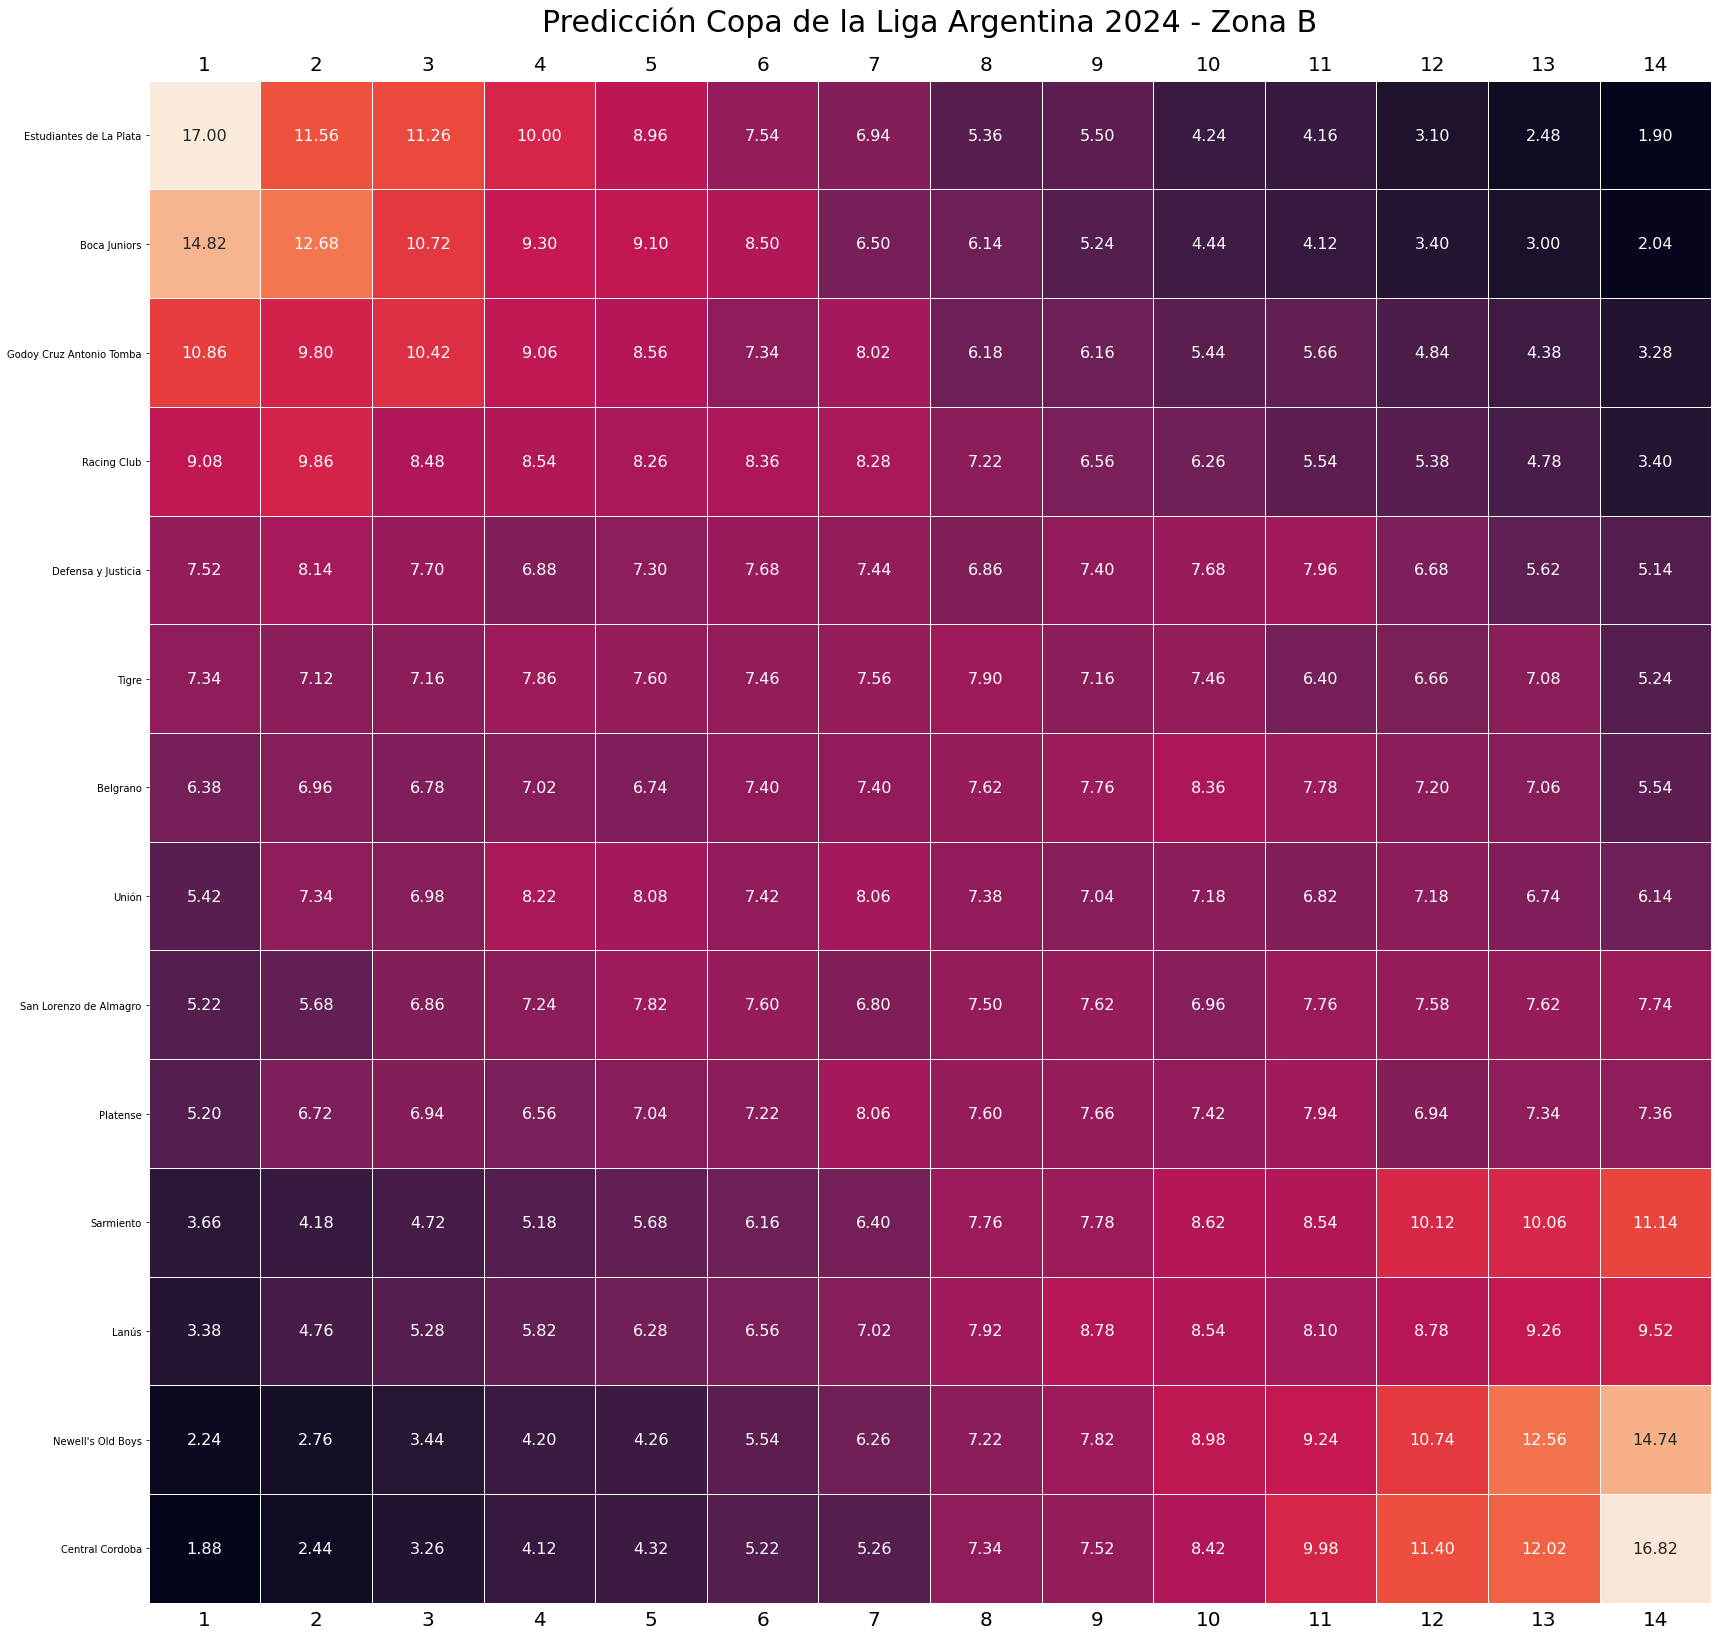

In [282]:
URL3 = 'https://github.com/google/fonts/blob/main/ofl/lato/Lato-Bold.ttf?raw=true'
nexa = FontManager(URL3)
URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

plt.figure(figsize=(28,28))
sns.heatmap(df_placings.set_index('Equipo').sort_values(by=1, ascending=False), lw=1, annot=True, fmt=".2f", annot_kws = {'fontsize': 16}, cbar=False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=20, labelbottom = True, bottom=False, top = False, labeltop=True)
#plt.xticks(fontproperties=nexa.prop, size=25)
#plt.yticks(fontproperties=nexa.prop, size=25)
plt.title('Predicción Copa de la Liga Argentina 2024 - Zona B', size=30, pad=50)
plt.savefig('Predicción Copa de la Liga Argentina 2024 - Zona B.png', dpi=300, bbox_inches='tight')
plt.show()

In [75]:
df_concatenado_zonaa = pd.concat(lista_dfs_sim_zonaa, ignore_index=True)
df_concatenado_zonab = pd.concat(lista_dfs_sim_zonab, ignore_index=True)

# Calcular el Elo promedio para cada equipo
elo_promedio_por_equipo_zonaa = df_concatenado_zonaa.groupby('Team')['ELO'].mean().reset_index()
elo_promedio_por_equipo_zonab = df_concatenado_zonab.groupby('Team')['ELO'].mean().reset_index()

In [96]:
elos_clasificados_zonaa = elo_promedio_por_equipo_zonaa.sort_values(by='ELO', ascending=False).set_index('Team').loc[['River Plate', 'Talleres', 'Huracán', 'Atlético Tucumán']]
elos_clasificados_zonab = elo_promedio_por_equipo_zonab.sort_values(by='ELO', ascending=False).set_index('Team').loc[['Estudiantes de La Plata','Boca Juniors','Godoy Cruz Antonio Tomba','Racing Club']]
elos_clasificados = pd.concat([elos_clasificados_zonaa, elos_clasificados_zonab])

In [97]:
elos_clasificados

,ELO
Team,
River Plate,1701.693563
Talleres,1600.326340
Huracán,1446.749546
Atlético Tucumán,1513.095175
Estudiantes de La Plata,1570.820496
Boca Juniors,1647.353663
Godoy Cruz Antonio Tomba,1514.289291
Racing Club,1592.761684


In [316]:
fixtures_clasificacion = [[['Talleres', elos_clasificados.loc['Talleres']['ELO']], ['Racing Club', elos_clasificados.loc['Racing Club']['ELO']]],
                          [['Boca Juniors', elos_clasificados.loc['Boca Juniors']['ELO']], ['Huracán', elos_clasificados.loc['Huracán']['ELO']]],
                          [['River Plate', elos_clasificados.loc['River Plate']['ELO']], ['Godoy Cruz Antonio Tomba', elos_clasificados.loc['Godoy Cruz Antonio Tomba']['ELO']]],
                          [['Estudiantes de La Plata', elos_clasificados.loc['Estudiantes de La Plata']['ELO']], ['Atlético Tucumán', elos_clasificados.loc['Atlético Tucumán']['ELO']]]]

In [157]:
def simulate_round(fixtures):

    # Randomly shuffle so that in case of an exact tie (penalties), 
    # a random winner is chosen (rather than, e.g., team listed first)
    [np.random.shuffle(x) for x in fixtures]

    # Simulate matches
    results = simulate_matches(fixtures[:, :, 1].astype(np.float32))
    
    # Games that are still level at 90 mins
    still_level = results[:, 0] == results[:, 1]
    
    if still_level.sum() > 0:
        
        # For any (if any) games still level, simulate an extra third of a match (30 mins)
        extra_time_results = simulate_matches(fixtures[still_level, :, 1].astype(np.float32), lam_multiplier=1/3)
        
        # Add the extra time result to the original
        results[still_level] += extra_time_results

    # Determine winners, which is random in the case of a draw
    winners = fixtures[:, :, 0][np.arange(fixtures.shape[0]), results.argmax(axis=1)]
    
    # Round results - winner was who got more (unrounded), but we need rounding for ELO calculations
    results = np.round(results).astype(np.int16)

    # Extract ELOs
    ELOs = fixtures[:, :, 1].astype(np.float32)
    
    # Get W values from results and ELOs
    Ws = get_Ws(results, ELOs)
            
    # Get updated ELO scores
    new_ELOs = ELOs[np.arange(ELOs.shape[0]), results.argmax(axis=1)] + \
    np.array(get_elo_adjustments(ELOs, Ws, results))[np.arange(ELOs.shape[0]), results.argmax(axis=1)]
    
    # Create an array to store teams that advance and their update ELOs
    next_round = np.stack((winners, new_ELOs), axis=1)
    
    return next_round

In [323]:
resultados = simulate_round(np.array(fixtures_clasificacion))
resultados

array([['Talleres', '1629.6732189655304'],
       ['Boca Juniors', '1661.7307715415955'],
       ['River Plate', '1716.9177503585815'],
       ['Estudiantes de La Plata', '1565.881511926651']], dtype='<U32')

In [324]:
semifinales = [[[resultados[0][0], resultados[0][1]], [resultados[1][0], resultados[1][1]]],
[[resultados[2][0], resultados[2][1]], [resultados[3][0], resultados[3][1]]]]

In [331]:
simulate_round(np.array(semifinales))

array([['Boca Juniors', '1702.5903584957123'],
       ['River Plate', '1747.9317793250084']], dtype='<U32')

In [332]:
final = [[[resultados[0][0], resultados[0][1]], [resultados[1][0], resultados[1][1]]]]

In [334]:
ganador = simulate_round(np.array(final))
ganador_nombre = ganador[0]
ganador_nombre

array(['Talleres', '1662.4334540367126'], dtype='<U32')

In [198]:
df_zonaa

,Team,Points,GF,GA,ELO,GD,Zona
0,Atlético Tucumán,31,22,11,1566.736157,11,A
1,Barracas Central,28,20,9,1544.458404,11,A
2,Argentinos Juniors,26,21,14,1489.058293,7,A
3,Deportivo Riestra,25,19,13,1485.561358,6,A
4,Rosario Central,22,16,11,1706.950348,5,A
5,Talleres,22,22,19,1486.592056,3,A
6,Independiente,21,20,20,1495.847274,0,A
7,Banfield,18,20,20,1437.748800,0,A
8,Independiente Rivadavia,16,19,22,1543.239209,-3,A
9,River Plate,16,11,16,1548.731916,-5,A


In [246]:
#Ahora hay que simular n veces cada torneo, lleva banda esto.
lista_dfs_sim_zonaa_entero = []
lista_dfs_sim_zonab_entero = []
clasificados = []
semifinales = []
finales = []
ganadores = []

nsimulations = 5000
for n in tqdm(range(0,nsimulations)):
    df_list = [[team, 0, 0, 0, lista_elo_ratings_2[team]] \
            for i, team in enumerate(np.array(equipos).flatten())]
    all_groups_df = pd.DataFrame(df_list, columns=['Team', 'Points', 'GF', 'GA', 'ELO'])
    df_simulacion_1_torneo = simular_torneo(df_torneo, all_groups_df)
    #Meto en la lista cada simulación terminada. Despues con esta lista voy a hacer magias para calcular las probs.
    df_junto = df_simulacion_1_torneo.merge(zonaa, left_on='Team', right_on='Equipo', how='left').merge(zonab, left_on='Team', right_on='Equipo', how='left')
    df_junto['Equipo'] = df_junto['Equipo_x'].fillna('') + df_junto['Equipo_y'].fillna('')
    df_junto['Zona'] = df_junto['Zona_x'].fillna('') + df_junto['Zona_y'].fillna('')
    df_junto = df_junto.drop(columns=['Equipo_x', 'Zona_x', 'Equipo_y', 'Zona_y', 'Equipo'])
    df_zonaa = df_junto[df_junto['Zona'] == 'A'].sort_values(by='Points',ascending=False).reset_index(drop=True)
    df_zonab = df_junto[df_junto['Zona'] != 'A'].sort_values(by='Points',ascending=False).reset_index(drop=True)
    fixtures_clasificacion = [[[df_zonaa.iloc[0]['Team'], df_zonaa.iloc[0]['ELO']], [df_zonab.iloc[3]['Team'], elos_clasificados.loc['Racing Club']['ELO']]],
                          [[df_zonab.iloc[1]['Team'], df_zonab.iloc[1]['ELO']], [df_zonaa.iloc[2]['Team'], df_zonaa.iloc[2]['ELO']]],
                          [[df_zonaa.iloc[1]['Team'], df_zonaa.iloc[1]['ELO']], [df_zonab.iloc[2]['Team'], df_zonab.iloc[2]['ELO']]],
                          [[df_zonab.iloc[0]['Team'], df_zonab.iloc[0]['ELO']], [df_zonaa.iloc[3]['Team'], df_zonaa.iloc[3]['ELO']]]]
    lista_dfs_sim_zonaa_entero.append(df_zonaa)
    lista_dfs_sim_zonab_entero.append(df_zonab)
    clasificados.append(fixtures_clasificacion)
    resultados = simulate_round(np.array(fixtures_clasificacion))
    semifinalistas = [[[resultados[0][0], resultados[0][1]], [resultados[1][0], resultados[1][1]]],
        [[resultados[2][0], resultados[2][1]], [resultados[3][0], resultados[3][1]]]]
    semifinales.append(semifinalistas)
    finalistas = simulate_round(np.array(semifinalistas))
    final = [[[finalistas[0][0], finalistas[0][1]], [finalistas[1][0], finalistas[1][1]]]]
    finales.append([finalistas[0][0], finalistas[1][0]])
    ganador = simulate_round(np.array(final))
    ganadores.append([ganador[0][0]])


100%|██████████| 5000/5000 [15:21<00:00,  5.43it/s]  


In [252]:
frecuencia_ganadores = {}

# Recorrer la lista de enfrentamientos
for enfrentamiento in ganadores:
    for equipo in enfrentamiento:
        # Incrementar la frecuencia en el diccionario
        frecuencia_ganadores[equipo] = frecuencia_ganadores.get(equipo, 0) + 1

frecuencia_ganadores_ordenado = dict(sorted(frecuencia_ganadores.items(), key=lambda x: x[1], reverse=True))
frecuencia_ganadores_ordenado

{'River Plate': 717,
 'Boca Juniors': 442,
 'Talleres': 408,
 'Estudiantes de La Plata': 298,
 'Racing Club': 255,
 'Defensa y Justicia': 248,
 'Godoy Cruz Antonio Tomba': 210,
 'Argentinos Juniors': 209,
 'San Lorenzo de Almagro': 206,
 'Vélez Sarsfield': 157,
 'Atlético Tucumán': 155,
 'Tigre': 146,
 'Belgrano': 142,
 'Lanús': 135,
 'Huracán': 129,
 'Unión': 122,
 'Banfield': 109,
 'Barracas Central': 109,
 'Platense': 108,
 'Gimnasia y Esgrima La Plata': 107,
 'Independiente': 93,
 "Newell's Old Boys": 92,
 'Instituto': 91,
 'Sarmiento': 81,
 'Rosario Central': 79,
 'Central Cordoba': 63,
 'Deportivo Riestra': 55,
 'Independiente Rivadavia': 34}

In [253]:
frecuencia_finales = {}

# Recorrer la lista de enfrentamientos
for enfrentamiento in finales:
    for equipo in enfrentamiento:
        # Incrementar la frecuencia en el diccionario
        frecuencia_finales[equipo] = frecuencia_finales.get(equipo, 0) + 1

frecuencia_finales_ordenado = dict(sorted(frecuencia_finales.items(), key=lambda x: x[1], reverse=True))
frecuencia_finales_ordenado

{'River Plate': 1175,
 'Talleres': 841,
 'Boca Juniors': 803,
 'Estudiantes de La Plata': 632,
 'Racing Club': 502,
 'Defensa y Justicia': 455,
 'Argentinos Juniors': 428,
 'Godoy Cruz Antonio Tomba': 424,
 'San Lorenzo de Almagro': 378,
 'Atlético Tucumán': 347,
 'Tigre': 326,
 'Vélez Sarsfield': 313,
 'Belgrano': 306,
 'Huracán': 300,
 'Unión': 287,
 'Barracas Central': 269,
 'Lanús': 263,
 'Platense': 253,
 'Banfield': 238,
 'Independiente': 210,
 'Gimnasia y Esgrima La Plata': 207,
 'Instituto': 202,
 "Newell's Old Boys": 187,
 'Sarmiento': 183,
 'Deportivo Riestra': 141,
 'Central Cordoba': 132,
 'Rosario Central': 126,
 'Independiente Rivadavia': 72}

In [254]:
frecuencia_clasificados = {}
# Recorrer la estructura de listas de listas de listas
for lista_externa in clasificados:
    for lista_interna in lista_externa:
        for enfrentamiento in lista_interna:
            equipo = enfrentamiento[0]
            # Incrementar la frecuencia en el diccionario
            frecuencia_clasificados[equipo] = frecuencia_clasificados.get(equipo, 0) + 1

frecuencia_clasificados_ordenado = dict(sorted(frecuencia_clasificados.items(), key=lambda x: x[1], reverse=True))
frecuencia_clasificados_ordenado

{'Talleres': 3141,
 'River Plate': 2864,
 'Estudiantes de La Plata': 2491,
 'Boca Juniors': 2376,
 'Godoy Cruz Antonio Tomba': 2007,
 'Huracán': 1800,
 'Racing Club': 1798,
 'Atlético Tucumán': 1677,
 'Argentinos Juniors': 1537,
 'Defensa y Justicia': 1512,
 'Tigre': 1474,
 'Barracas Central': 1429,
 'Unión': 1398,
 'Belgrano': 1357,
 'Independiente': 1327,
 'Banfield': 1277,
 'Platense': 1271,
 'San Lorenzo de Almagro': 1250,
 'Instituto': 1204,
 'Vélez Sarsfield': 1103,
 'Gimnasia y Esgrima La Plata': 1021,
 'Lanús': 962,
 'Deportivo Riestra': 910,
 'Sarmiento': 887,
 "Newell's Old Boys": 632,
 'Central Cordoba': 585,
 'Rosario Central': 386,
 'Independiente Rivadavia': 324}

In [265]:
df_clasificados = pd.DataFrame(list(frecuencia_clasificados_ordenado.items()), columns=['Equipo', 'Frecuencia'])
df_finales = pd.DataFrame(list(frecuencia_finales_ordenado.items()), columns=['Equipo', 'Frecuencia'])
df_ganador = pd.DataFrame(list(frecuencia_ganadores_ordenado.items()), columns=['Equipo', 'Frecuencia'])

df_total = df_clasificados.merge(df_finales, on='Equipo', suffixes=['_clasif', '_finales']).merge(df_ganador, on='Equipo', suffixes=['', '_ganador'])
df_total['% de clasificar'] = (df_total['Frecuencia_clasif'] / 5000) * 100
df_total['% de llegar a la final'] = (df_total['Frecuencia_finales'] / 5000) * 100
df_total['% de salir campeon'] = (df_total['Frecuencia'] / 5000) * 100
df_plot = df_total.drop(columns=['Frecuencia_clasif', 'Frecuencia_finales', 'Frecuencia']).sort_values(by='% de salir campeon', ascending=False).reset_index(drop=True)

In [285]:
df_plot.to_excel('resultados.xlsx')